In [24]:
import scipy
import json
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

In [44]:
def convertFile(fileInName):   
    with open(fileInName, 'r') as fileIn:
        fileContents = scipy.io.loadmat(fileInName)
        covisDict = {}
        covisDict['header'] = fileContents['__header__'].decode('utf-8')
        covisDict['version'] = fileContents['__version__']
        covisDict['globals'] = fileContents['__globals__']
        covis = fileContents['covis'][0][0]
        for name in covis.dtype.names:
            covisDict[name] = covis[name]
        
        print(f'{fileInName} has been converted')
        return covisDict

In [68]:
def readCoords2D(fileInName):
    with open(fileInName) as fileIn:
        covisDict = convertFile(fileInName)
        wList = [w for w in covisDict['grid'][0][0][0]['w']]
        xList = [x for x in covisDict['grid'][0][0][0]['x']]
        yList = [y for y in covisDict['grid'][0][0][0]['y']]
        vList = [v for v in covisDict['grid'][0][0][0]['v']]
        coordsDict = {'xList': xList, 'yList': yList, 'vList': vList, 'wList': wList}
        return coordsDict

In [62]:
def readCoords3D(fileInName):
    covisDict = convertFile(fileInName)
    xList = [x for x in covisDict['grid'][0][0][0]['x']]
    yList = [y for y in covisDict['grid'][0][0][0]['y']]
    zList = [z for z in covisDict['grid'][0][0][0]['z']]
    vList = [v for v in covisDict['grid'][0][0][0]['v']]
    wList = [w for w in covisDict['grid'][0][0][0]['w']]
    coordsDict = {'xList': xList, 'yList': yList, 'zList': zList, 'vList': vList, 'wList': wList}
    return coordsDict

In [67]:
def createCoordsOfInterest(fileInName):
    coordsDict = readCoords2D(fileInName)
    coordsOfInterest = {'xList': [], 'yList': [], 'vList': [], 'wList': []}
    ind = 0
    for key in coordsDict.keys():
        for array in coordsDict['vList']:
            coordsOfInterest[key].append(coordsDict[key][ind])
            ind += 1
        ind = 0
    return coordsDict

In [66]:
def createPlot(fileInName):
    coordsOfInterest = createCoordsOfInterest(fileInName)
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(coordsOfInterest['xList'], coordsOfInterest['yList'], c=coordsOfInterest['vList'], cmap='viridis', vmin=0, vmax=0.00005)

    cbar = plt.colorbar(scatter)
    cbar.set_label('Data Values')

    plt.xlabel('East of COVIS (m)')
    plt.ylabel('North of COVIS (m)')
    plt.title(f'{fileInName}')

In [64]:
def plotDiffuse2D(fileInName):
    coordsOfInterest = createCoordsOfInterest(fileInName)
    plt.figure(figsize=(10, 6))
    max = np.amax(np.concatenate(coordsOfInterest['vList']))
    min = np.amin(np.concatenate(coordsOfInterest['vList'])) + 10e-10
    norm = mcolors.LogNorm(vmin=min, vmax=max)
    scatter = plt.scatter(coordsOfInterest['xList'], coordsOfInterest['yList'], c = coordsOfInterest['vList'], cmap = 'viridis', norm = norm)

    cbar = plt.colorbar(scatter)
    cbar.set_label('Data Values')

    plt.xlabel('East of COVIS (m)')
    plt.ylabel('North of COVIS (m)')
    plt.title(fileInName.split('\\')[-1])
    plt.show()


matFiles\\COVIS-20230701T003002-diffuse1.mat has been converted


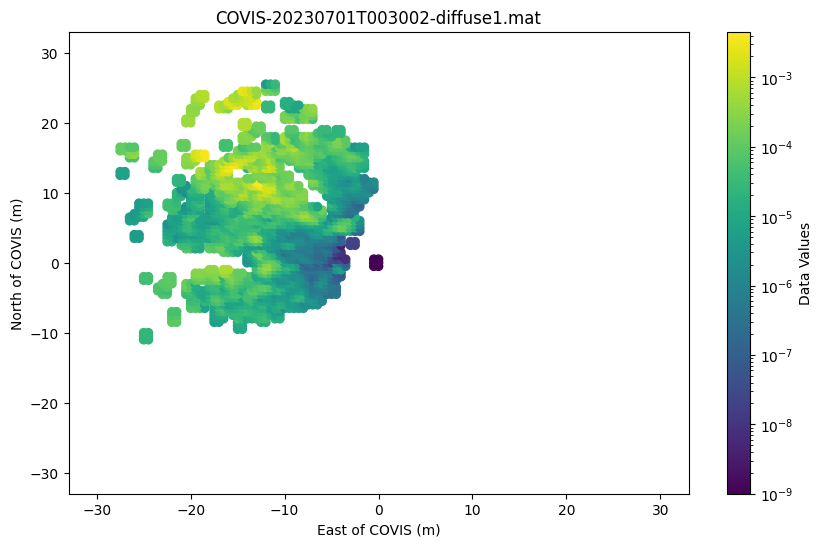

matFiles\\COVIS-20230701T003002-diffuse1.mat has been converted


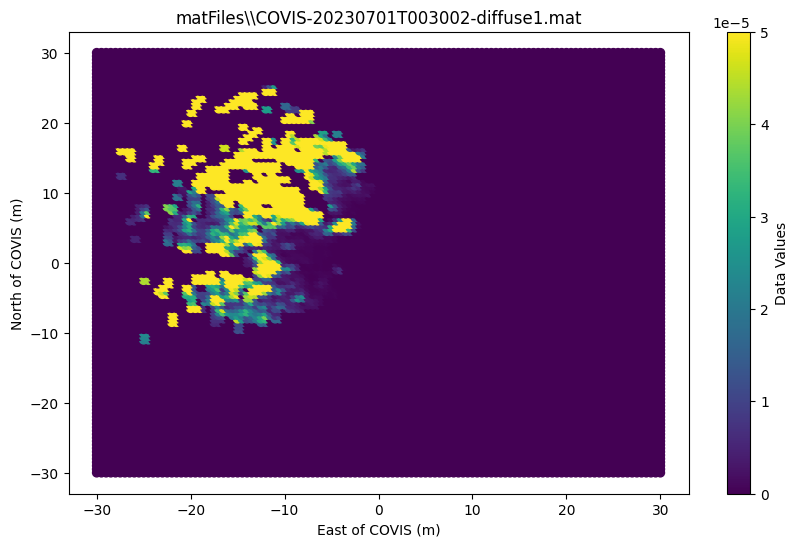

In [69]:
plotDiffuse2D(r'matFiles\\COVIS-20230701T003002-diffuse1.mat')
createPlot(r'matFiles\\COVIS-20230701T003002-diffuse1.mat')